# Russian License Plate Blurring

Our goal will be to use OpenCV's built-in Haar Cascades to blur license plates detected in an image!

OpenCV comes with a Russian license plate detector .xml file that we can use to detect RUssian license plates within images. Once we detect a license plate, we apply OpenCV's blurring technique to blur the detected License plate ROI.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('russian_license_plate.jpg')

In [3]:
#Create a function that displays the image in a larger scale and correct coloring for matplotlib.

def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

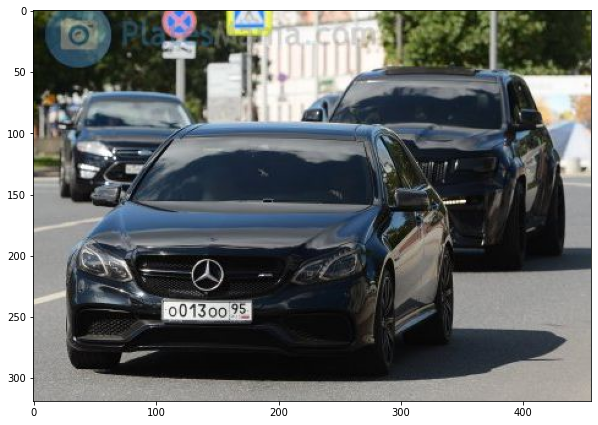

In [4]:
display(img)

In [8]:
# Load the haarcascade_russian_plate_number.xml file

plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [9]:
# Create a function that takes in an image and draws a rectangle around what it detects to be a license plate.

def detect_plate(img):  
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return plate_img
    

In [10]:
result = detect_plate(img)

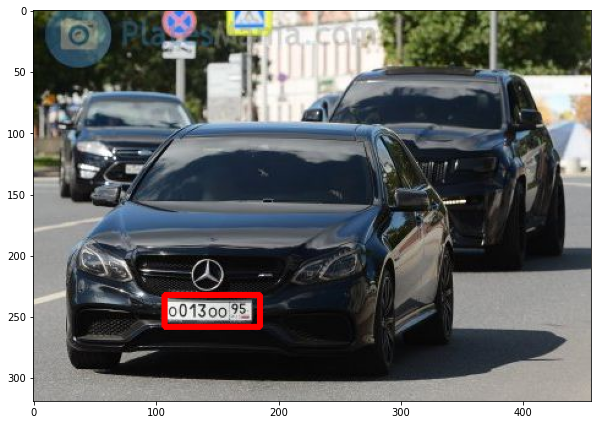

In [11]:
display(result)

In [12]:
# Edit the above function to add blurring functionality as well

def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [13]:
result = detect_and_blur_plate(img)

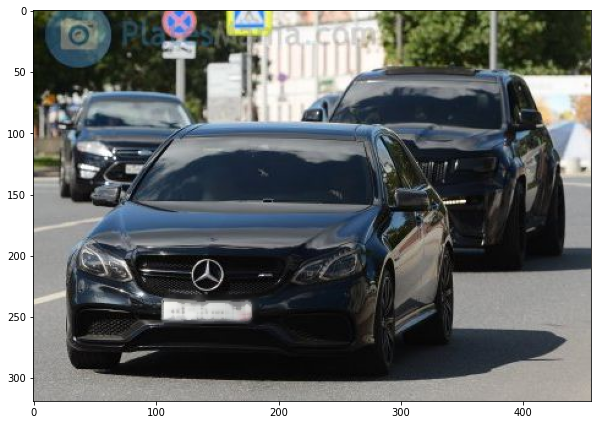

In [14]:
display(result)